In [2]:
### Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data

In [3]:
data = pd.read_csv('HR_data.csv')

In [4]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis

In [6]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [15]:
cols = data.columns
txt = 'The Features we have in HR Data are as Follows:'
print (f'{txt:-^100}')
for col in cols:
    print (col)

--------------------------The Features we have in HR Data are as Follows:---------------------------
satisfaction_level
last_evaluation
number_project
average_montly_hours
time_spend_company
Work_accident
left
promotion_last_5years
Department
salary


We see 'Left' is the dependent variable which we need to predict based on the presence of the other features

In [16]:
data['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [31]:
import warnings
warnings.filterwarnings("ignore")

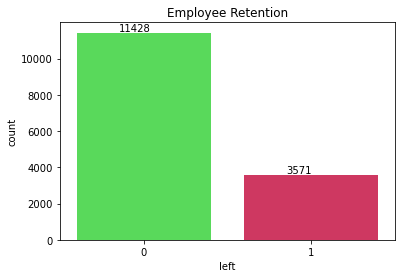

In [75]:
import seaborn as sb

ax = sb.countplot(x='left', data=data, dodge=False, palette=['#44EE46',"#E71F56"])
for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+100))
plt.title("Employee Retention")
plt.show()

#### Visualize how each feature is affecting retention

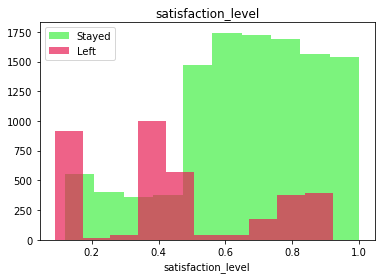

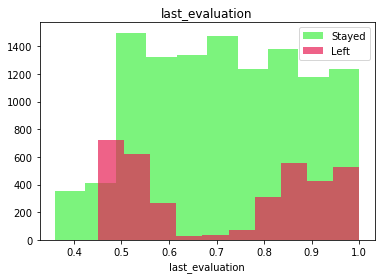

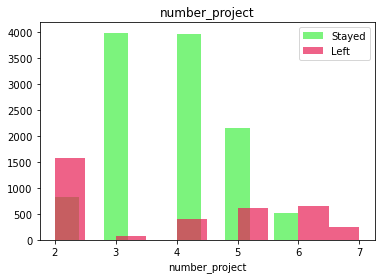

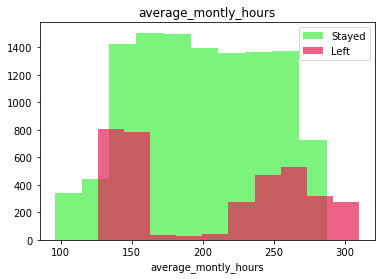

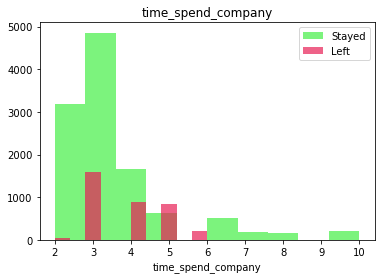

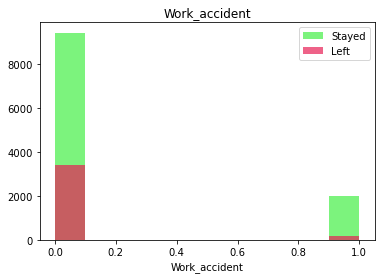

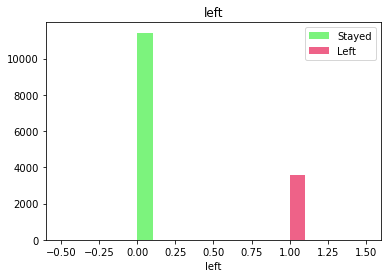

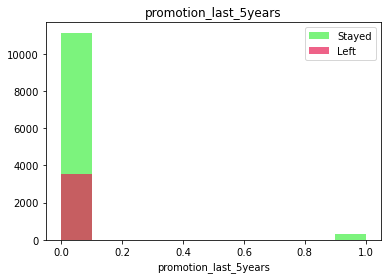

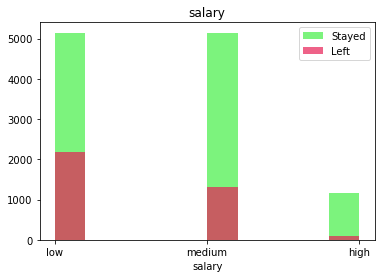

In [97]:
for col in cols:
    if (col!='Department') & (col!='Left'):
        plt.hist(data[data['left']==0][col], color='#44EE46', alpha=0.7)
        plt.hist(data[data['left']==1][col], color='#E71F56', alpha=0.7)
        
        plt.title(col) 
        plt.xlabel(col)
        plt.legend(['Stayed', 'Left'])
        plt.show()

### Impact of Salary on rentention

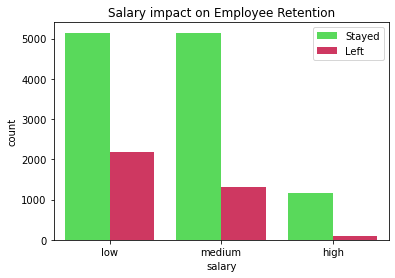

In [127]:
cp = sb.countplot('salary', hue='left', data=data, palette=['#44EE46',"#E71F56"])
plt.title("Salary impact on Employee Retention")
cp.legend(labels=['Stayed', 'Left'])
plt.show()

### Rention in each Department

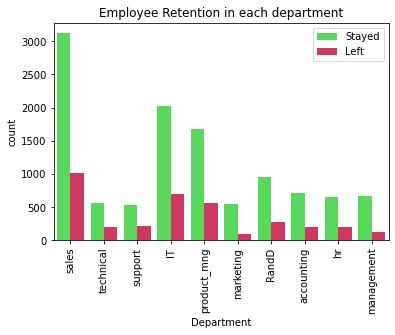

In [126]:
cp = sb.countplot('Department', hue='left', data=data, palette=['#44EE46',"#E71F56"])
cp.set_xticklabels(labels=data['Department'].value_counts().index, rotation=90)
cp.legend(labels=['Stayed', 'Left'])
plt.title("Employee Retention in each department")
plt.show()

# Data Cleaning

In [128]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

There are no NULL Values, which is great!

In [129]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Seems like the data is BALANCED as there are no significant outliers, hence we can conclude Data cleaning.

# Feature Engineering

In [79]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


By taking the mean of each feature against retention, we see, Satisfaction level, Average monthly hours and Promotion are the features which have high impact on retention. 

Hence the features to be kept for further procedures are as follows:
1. Satisfaction Level 
2. Average Monthlyt Hours
3. Promotion in Last 5 years
4. Salary
5. Left (Dependent Variable)

In [136]:
data2 = data[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]

In [137]:
data2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


### One hot Encoding for categorical variables

Salary feature has categorical data, hence lets apply OneHotEncoding


In [142]:
dummies = pd.get_dummies(data2['salary'])

In [144]:
dummies.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [147]:
### Dropping Salary feature and creating a new Dataframe along with OneHotEncoded values
data3 = pd.concat([data2.drop(columns='salary'), dummies], axis='columns')
data3.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,high,low,medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


### Assigning Independent and Dependent variables

In [152]:
X = data3.drop(columns='left')
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [153]:
y = data3['left']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

### Splitting Train and Test Datasets

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [219]:
len(X_train), len(X_test)

(8999, 6000)

# Building Model for CLassification

In [202]:
from sklearn.metrics import classification_report

### Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression

In [228]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.7748638737637515

In [247]:
y_pred_lr = lr.predict(X_test)

In [249]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      4562
           1       0.54      0.26      0.35      1438

    accuracy                           0.77      6000
   macro avg       0.67      0.59      0.60      6000
weighted avg       0.74      0.77      0.74      6000



### KNN Classifier

In [220]:
from sklearn.neighbors import KNeighborsClassifier

In [224]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9435492832536948

In [251]:
y_pred_knn = knn.predict(X_test)

In [252]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4562
           1       0.74      0.79      0.76      1438

    accuracy                           0.88      6000
   macro avg       0.84      0.85      0.84      6000
weighted avg       0.89      0.88      0.88      6000



### Support Vector Machines

In [235]:
from sklearn.svm import SVC

In [236]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

0.7741971330147794

In [253]:
y_pred_svm = svm.predict(X_test)

In [254]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      4562
           1       1.00      0.05      0.09      1438

    accuracy                           0.77      6000
   macro avg       0.88      0.52      0.48      6000
weighted avg       0.82      0.77      0.68      6000



### Naive Bayes

In [239]:
from sklearn.naive_bayes import GaussianNB

In [240]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.678742082453606

In [255]:
y_pred_nb = nb.predict(X_test)

In [422]:
type(y_pred_nb)

numpy.ndarray

In [256]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      4562
           1       0.40      0.78      0.53      1438

    accuracy                           0.66      6000
   macro avg       0.65      0.70      0.63      6000
weighted avg       0.78      0.66      0.69      6000



### Decision Tree

In [404]:
from sklearn.tree import DecisionTreeRegressor

In [413]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

0.9461842668982111

In [429]:
y_pred_dt = dt.predict(X_test)

In [435]:
### Converting all array elements to int (as Decision Tree Predict returns Float Values)
y_pred_dt = ([ int(x) for x in y_pred_dt ])

In [434]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4562
           1       0.84      0.80      0.82      1438

    accuracy                           0.92      6000
   macro avg       0.89      0.88      0.88      6000
weighted avg       0.92      0.92      0.92      6000



# Conclusion

In [265]:
from sklearn.metrics import accuracy_score

In [442]:
### Creating a Table/Dataframe of Models and their performance
result = []

preds = [y_pred_lr, y_pred_knn, y_pred_svm, y_pred_nb, y_pred_dt]
models = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree']
for pred, model in zip(preds, models):
    result.append({
        'Models': model,
        'Accuracy' : accuracy_score(y_test, pred)
    })
    
result_df = pd.DataFrame(result)

In [443]:
### Function to Highlight the Best and Worst performing Models
def highlight_max(x, mxm, mnm):
    if(x['Accuracy'] == mxm):
         return ['background-color: #44EE46']*len(x)
    elif(x['Accuracy'] == mnm):
         return ['background-color: #E71F56']*len(x)
    else:
        return ['background-color: white']*len(x)
        
mxm = result_df['Accuracy'].max()
mnm = result_df['Accuracy'].min()

result_df.style.apply(lambda x: highlight_max(x, mxm, mnm), axis=1)

,Models,Accuracy
0,Logistic Regression,0.769000
1,KNN,0.882667
2,SVM,0.771667
3,Naive Bayes,0.663000
4,Decision Tree,0.916667


#### --- We see Decision Tree has the highest Accuracy Score with 91.6% Accuracy and Naive Bayes has the least Accuracy of 66.3%---